This first cell imports the necessary libraries for this project

In [20]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas_ta as ta
from sklearn.model_selection import train_test_split

The following cell reads the Apple stock csv into a dataframe named df

In [21]:
df = pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-12,146.210007,146.320007,144.000000,144.500000,143.679138,76299700
1,2021-07-13,144.029999,147.460007,143.630005,145.639999,144.812653,100827100
2,2021-07-14,148.100006,149.570007,147.679993,149.149994,148.302704,127050800
3,2021-07-15,149.240005,150.000000,147.089996,148.479996,147.636520,106820300
4,2021-07-16,148.460007,149.759995,145.880005,146.389999,145.558380,93251400
...,...,...,...,...,...,...,...
246,2022-07-01,136.039993,139.039993,135.660004,138.929993,138.929993,71007500
247,2022-07-05,137.770004,141.610001,136.929993,141.559998,141.559998,73353800
248,2022-07-06,141.350006,144.119995,141.080002,142.919998,142.919998,74064300
249,2022-07-07,143.289993,146.550003,143.279999,146.350006,146.350006,66253700


This following cell sets the date to index all of the rows in the dataframe

In [22]:
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-07-12,2021-07-12,146.210007,146.320007,144.000000,144.500000,143.679138,76299700
2021-07-13,2021-07-13,144.029999,147.460007,143.630005,145.639999,144.812653,100827100
2021-07-14,2021-07-14,148.100006,149.570007,147.679993,149.149994,148.302704,127050800
2021-07-15,2021-07-15,149.240005,150.000000,147.089996,148.479996,147.636520,106820300
2021-07-16,2021-07-16,148.460007,149.759995,145.880005,146.389999,145.558380,93251400
...,...,...,...,...,...,...,...
2022-07-01,2022-07-01,136.039993,139.039993,135.660004,138.929993,138.929993,71007500
2022-07-05,2022-07-05,137.770004,141.610001,136.929993,141.559998,141.559998,73353800
2022-07-06,2022-07-06,141.350006,144.119995,141.080002,142.919998,142.919998,74064300


The following cell sets a datframe named df2 equal to just the 'Adj Close' column from df. this is due to the fact we will eventually utilize exponential moving averages to predict Adj Close

In [23]:

df2 = df[['Adj Close']]

The following cell plots a scatter plot of adjusted closing price and the date

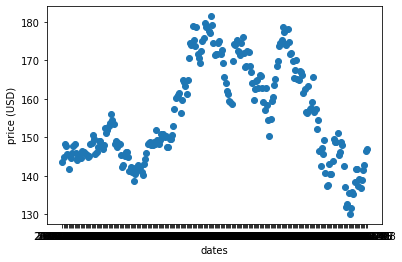

In [24]:
plt.xlabel('dates')
plt.ylabel('price (USD)')
plt.scatter(df.Date, df['Adj Close'])

The following utilzies the pandas ta library to calculate the exponential moving average in a five day interval.

In [25]:
df.ta.ema(close='Adj Close', length=5, append=True)
df = df[['Adj Close', 'EMA_5']]
df

,Adj Close,EMA_5
Date,,
2021-07-12,143.679138,NaN
2021-07-13,144.812653,NaN
2021-07-14,148.302704,NaN
2021-07-15,147.636520,NaN
2021-07-16,145.558380,145.997879
...,...,...
2022-07-01,138.929993,138.364293
2022-07-05,141.559998,139.429528
2022-07-06,142.919998,140.593018


This following cell appends the exponential moving average column to the second dataframe

In [26]:
df2.ta.ema(close='Adj Close', length=5, append=True)

df2

/var/folders/81/hx1y15rj4qsfn4jqz05vjjqm0000gn/T/ipykernel_2442/3610025043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.ta.ema(close='Adj Close', length=5, append=True)


,Adj Close,EMA_5
Date,,
2021-07-12,143.679138,NaN
2021-07-13,144.812653,NaN
2021-07-14,148.302704,NaN
2021-07-15,147.636520,NaN
2021-07-16,145.558380,145.997879
...,...,...
2022-07-01,138.929993,138.364293
2022-07-05,141.559998,139.429528
2022-07-06,142.919998,140.593018


The following cell creates a scatterplot between the date and the exponential moving average.

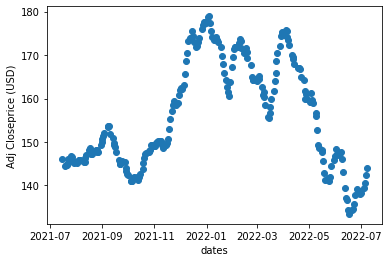

In [27]:
plt.xlabel('dates')
plt.ylabel('Adj Closeprice (USD)')
plt.scatter(df.index, df['EMA_5'])

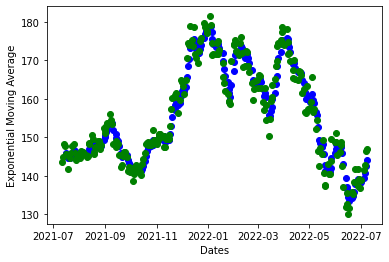

In [28]:
plt.xlabel('Dates')
plt.ylabel('Exponential Moving Average')
plt.scatter(df.index, df['EMA_5'], color = 'blue')
plt.scatter(df.index, df['Adj Close'], color = 'green')

Looking at the plot, we can see that the exponential moving average (green) seems to be a good fit for closed adjusted price (blue).

In [30]:
df2.head()

,Adj Close,EMA_5
Date,,
2021-07-12,143.679138,NaN
2021-07-13,144.812653,NaN
2021-07-14,148.302704,NaN
2021-07-15,147.636520,NaN
2021-07-16,145.558380,145.997879


Since the exponential moving average is within a 5 day interval, the first 5 days within our dataset will not have values, hence the first 5 rows will be null. Therefore, we will drop the first 5 rows in the dataset.

In [31]:
df3 = df2.iloc[5:]
df3

,Adj Close,EMA_5
Date,,
2021-07-19,141.640762,144.545507
2021-07-20,145.319733,144.803582
2021-07-21,144.574020,144.727061
2021-07-22,145.966049,145.140057
2021-07-23,147.716064,145.998726
...,...,...
2022-07-01,138.929993,138.364293
2022-07-05,141.559998,139.429528
2022-07-06,142.919998,140.593018


In the following cell we will create our xtrain, xtest, ytrain, and ytest dataframes with a test size of .2. We will be utiliziing 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df3[['Adj Close']], df3[['EMA_5']], test_size=.2)



In [33]:
from sklearn.linear_model import LinearRegression

pred = LinearRegression()
pred.fit(X_train, y_train)
y_pred = pred.predict(X_test)
pred.score(X_test, y_test)

0.9486253001441769

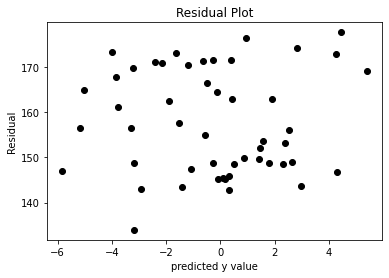

In [34]:
plt.title('Residual Plot')
plt.xlabel('predicted y value')
plt.ylabel('Residual')
residuals = y_pred - y_test
plt.scatter(residuals,y_pred, color = 'black')

Looking at the plot of the residuals between adjusted closing price and exponential moving average, it seems that linear regression is appropriate. This is due to the fact that there seems to be no apparant pattern within the residual plot.

In [35]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('The following value is the mean_square_error', mean_absolute_error(y_test, y_pred))
print('The following value is the coefficient of determination', r2_score(y_test, y_pred))
print("The following value is the model's coefficient ", pred.coef_)



The following value is the mean_square_error 2.1122065913200005
The following value is the coefficient of determination 0.9486253001441769
The following value is the model's coefficient  [[0.94750894]]
